In [1]:
 #This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [2]:
from google.colab import files
#importing data set from file #https://www.kaggle.com/code/nityam07/student-dropout-prediction-using-ml-and-dl-92-acc/notebook
upload = files.upload()

Saving dataset.csv to dataset.csv


In [4]:
df= pd.read_csv("dataset.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

35 coulmns and 4424 entries, 0 to 4423


About this file
1. Marital status: The marital status of the student. (Categorical)
2. Application mode: The method of application used by the student. (Categorical)
3. Application order: The order in which the student applied. (Numerical)
4. Course: The course taken by the student. (Categorical)
5. Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
6. Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
7. Nacionality: The nationality of the student. (Categorical)
8. Mother's qualification: The qualification of the student's mother. (Categorical)
9. Father's qualification: The qualification of the student's father. (Categorical)
10. Mother's occupation: The occupation of the student's mother. (Categorical)
11. Father's occupation: The occupation of the student's father. (Categorical)
12. Displaced: Whether the student is a displaced person. (Categorical)
13. Educational special needs: Whether the student has any special educational needs. (Categorical)
14. Debtor: Whether the student is a debtor. (Categorical)
15. Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
16. Gender: The gender of the student. (Categorical)
17. Scholarship holder: Whether the student is a scholarship holder. (Categorical)
18. Age at enrollment: The age of the student at the time of enrollment. (Numerical)
19. International: Whether the student is an international student. (Categorical)
20. Curricular units 1st sem (credited): The number of curricular units
21. credited by the student in the first semester. (Numerical)
22. Curricular units 1st sem (enrolled): The number of curricular units
23. enrolled by the student in the first semester. (Numerical)
24. Curricular units 1st sem (evaluations): The number of curricular units
25. evaluated by the student in the first semester. (Numerical)
26. Curricular units 1st sem (approved): The number of curricular units
27. approved by the student in the first semester. (Numerical)

In [6]:
for i in df.columns:
  dis = len(df[i].unique())    # caluclates the unique values of each column
  print(f"{i} - {dis}")

Marital status - 6
Application mode - 18
Application order - 8
Course - 17
Daytime/evening attendance - 2
Previous qualification - 17
Nacionality - 21
Mother's qualification - 29
Father's qualification - 34
Mother's occupation - 32
Father's occupation - 46
Displaced - 2
Educational special needs - 2
Debtor - 2
Tuition fees up to date - 2
Gender - 2
Scholarship holder - 2
Age at enrollment - 46
International - 2
Curricular units 1st sem (credited) - 21
Curricular units 1st sem (enrolled) - 23
Curricular units 1st sem (evaluations) - 35
Curricular units 1st sem (approved) - 23
Curricular units 1st sem (grade) - 805
Curricular units 1st sem (without evaluations) - 11
Curricular units 2nd sem (credited) - 19
Curricular units 2nd sem (enrolled) - 22
Curricular units 2nd sem (evaluations) - 30
Curricular units 2nd sem (approved) - 20
Curricular units 2nd sem (grade) - 786
Curricular units 2nd sem (without evaluations) - 10
Unemployment rate - 10
Inflation rate - 9
GDP - 10
Target - 3


In [9]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())
    print("---- ***** ---")

---- Marital status ---
1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64
---- ***** ---
---- Application mode ---
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64
---- ***** ---
---- Application order ---
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64
---- ***** ---
---- Course ---
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64
---- ***** ---
---- Daytime/evening attendance ---
1    3941
0     483
Name: Daytime/evening attendance, dtype: int64
---- ***** ---
---- Previous qualification ---
1     3717
14     219
12     162
3      126
9       

In [11]:

numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns)

      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                        

In [12]:
cat_columns = df.select_dtypes(include=['object'])
print(cat_columns)


        Target
0      Dropout
1     Graduate
2      Dropout
3     Graduate
4     Graduate
...        ...
4419  Graduate
4420   Dropout
4421   Dropout
4422  Graduate
4423  Graduate

[4424 rows x 1 columns]


EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

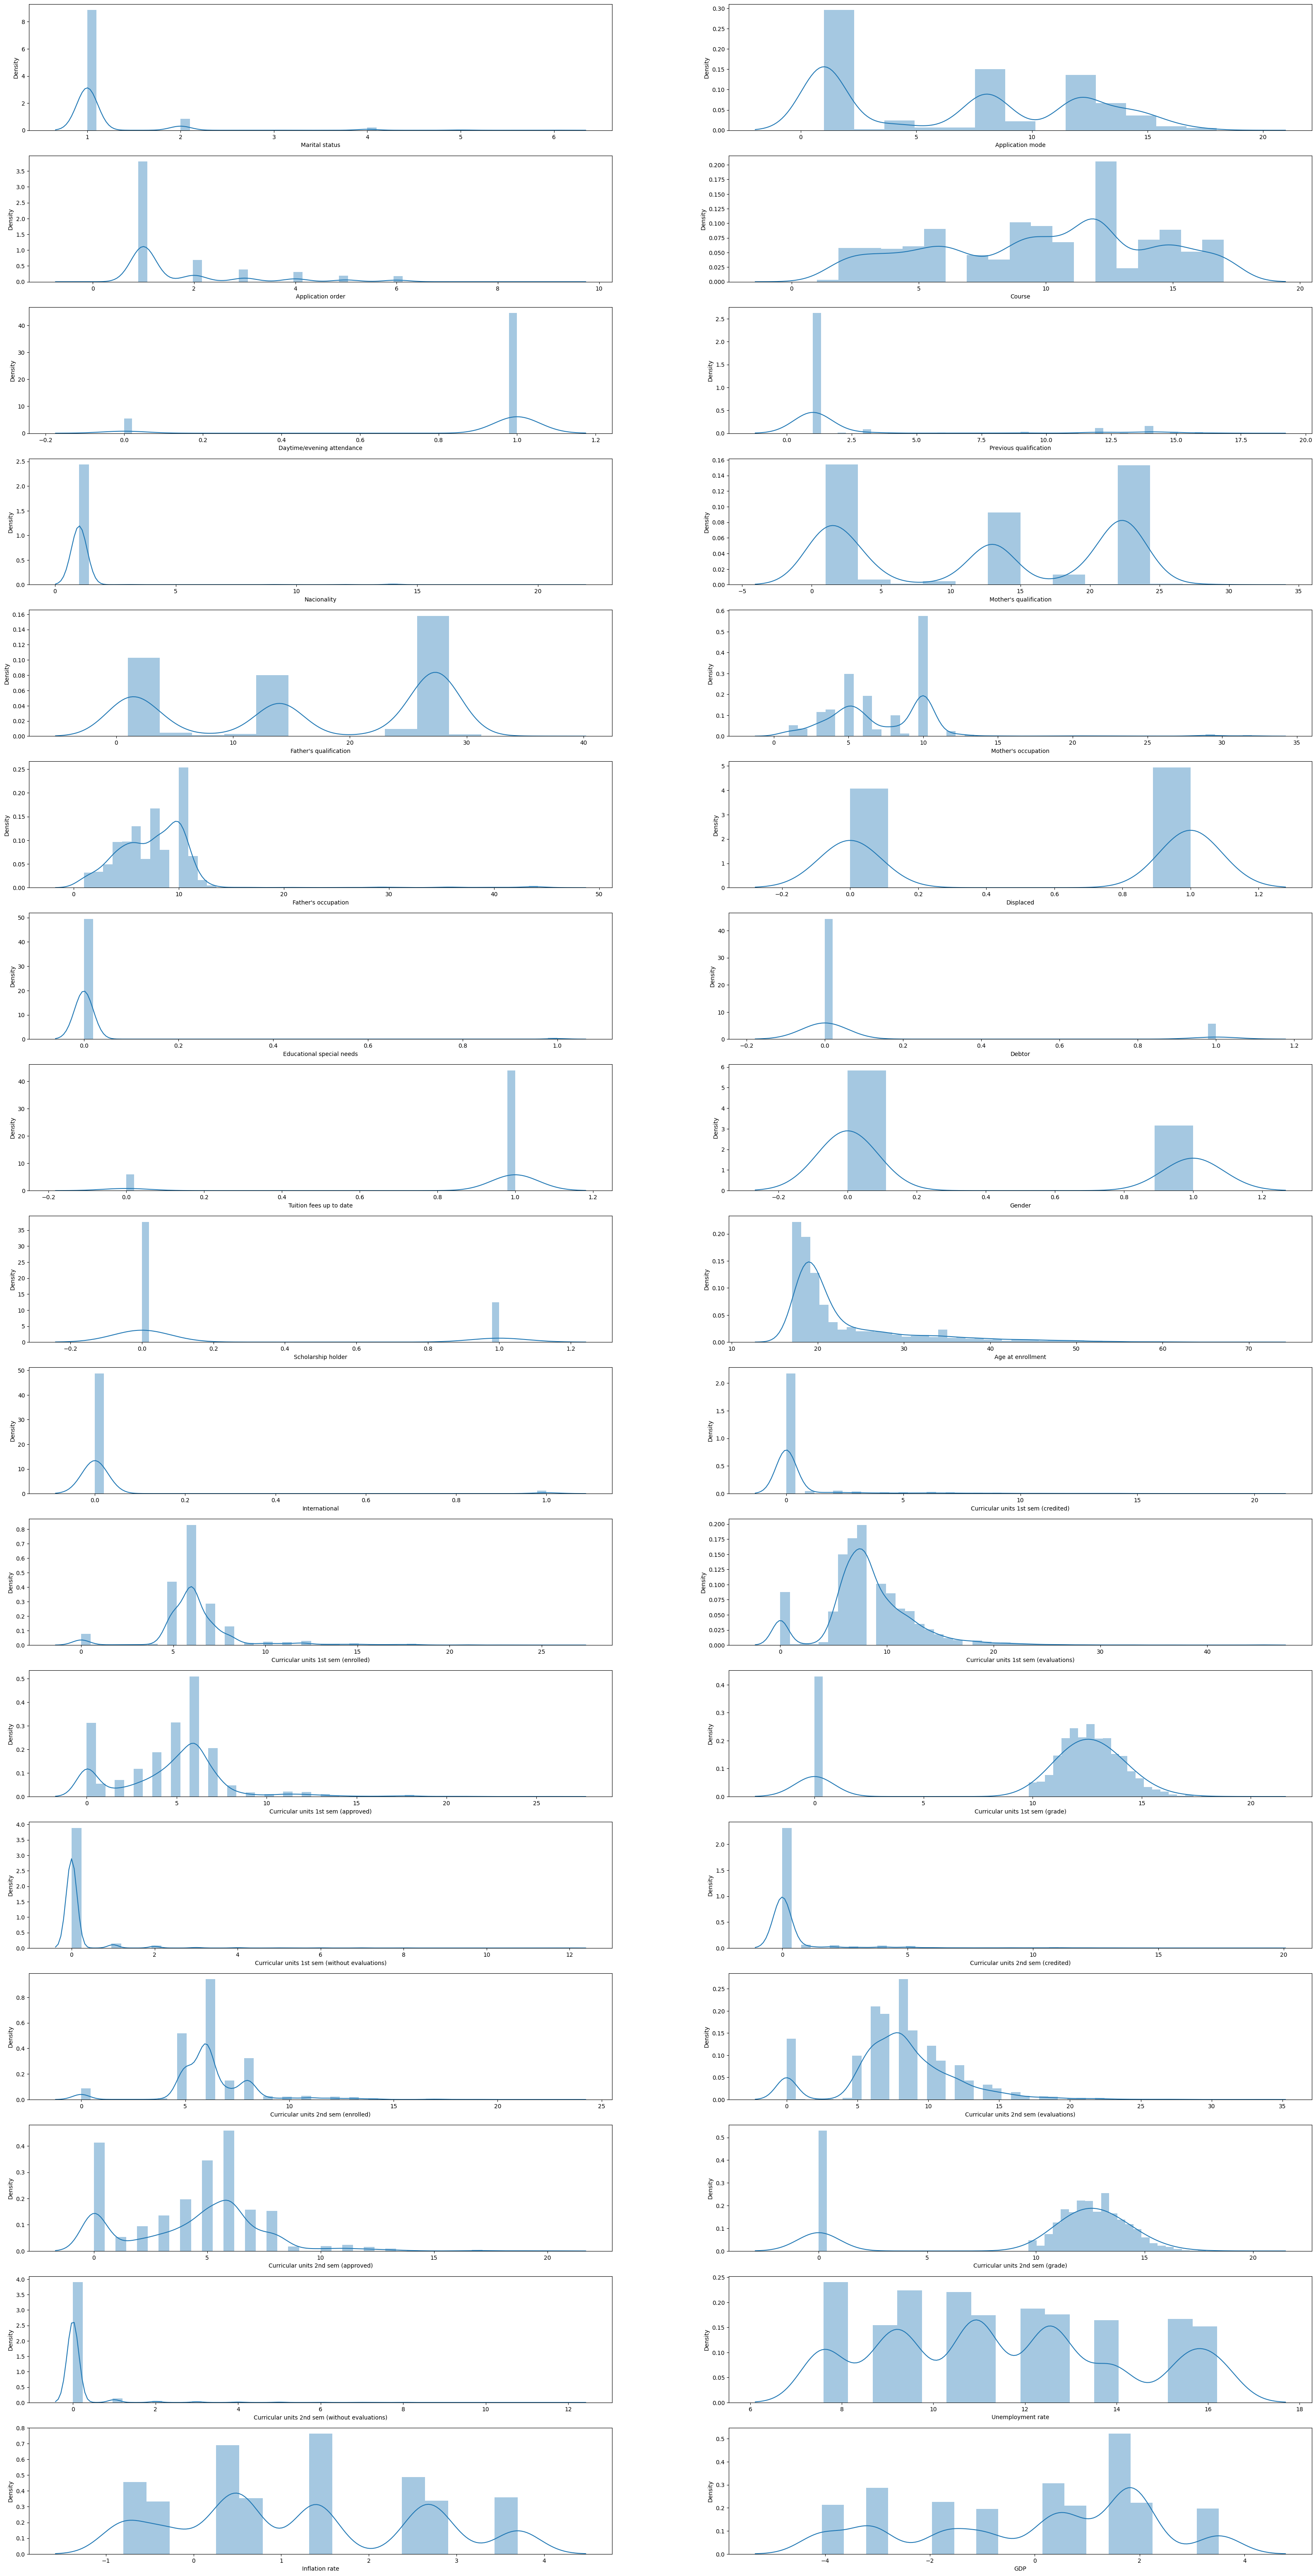

In [13]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,80)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax)

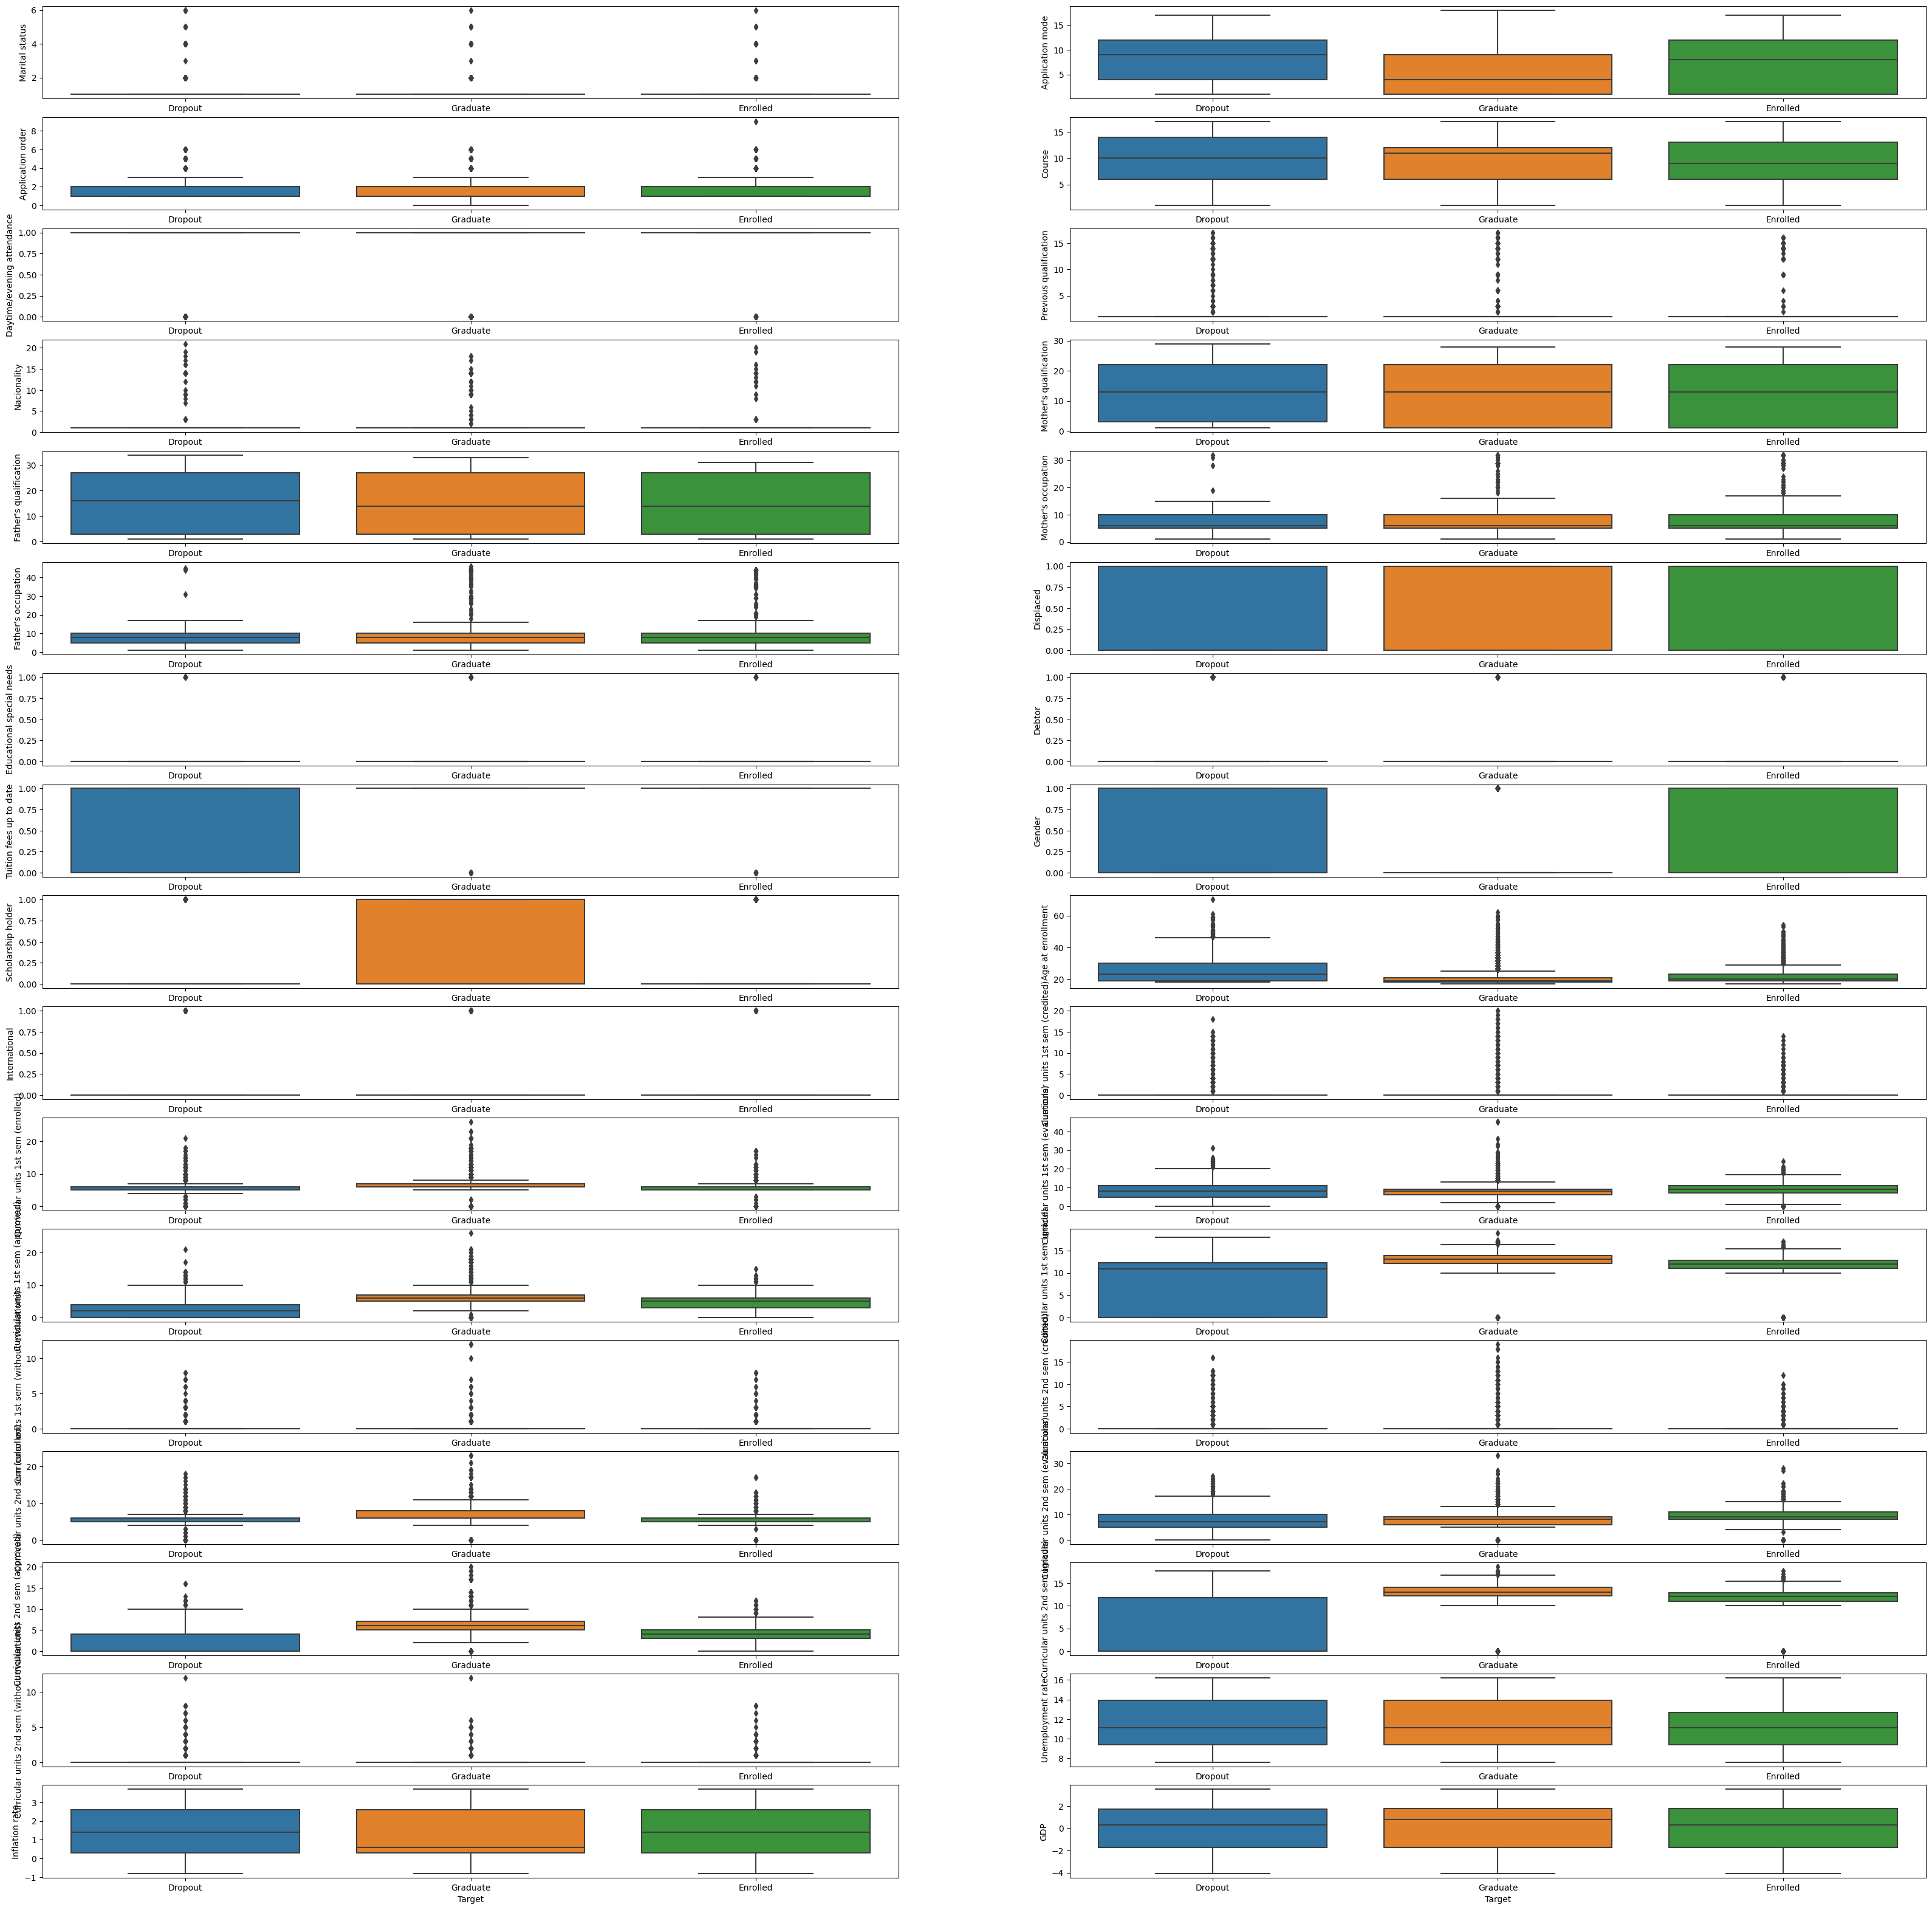

In [14]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x='Target',y=df[col], ax = ax , data=df)

In [15]:
df.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

LABEL ENCODE TRAGET VARIABLE

WE WILL REMOVE ALL THE ENROLLED STUDENTS DATA AS WE NEED TO PREDICT DROPOUT AND ENROLLED COMES NEITHER IN GRADUATED NOR DROPOUT WILL CAUSE US PROBLEMS



In [16]:
df=df[df.Target!='Enrolled']

In [18]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


<Axes: >

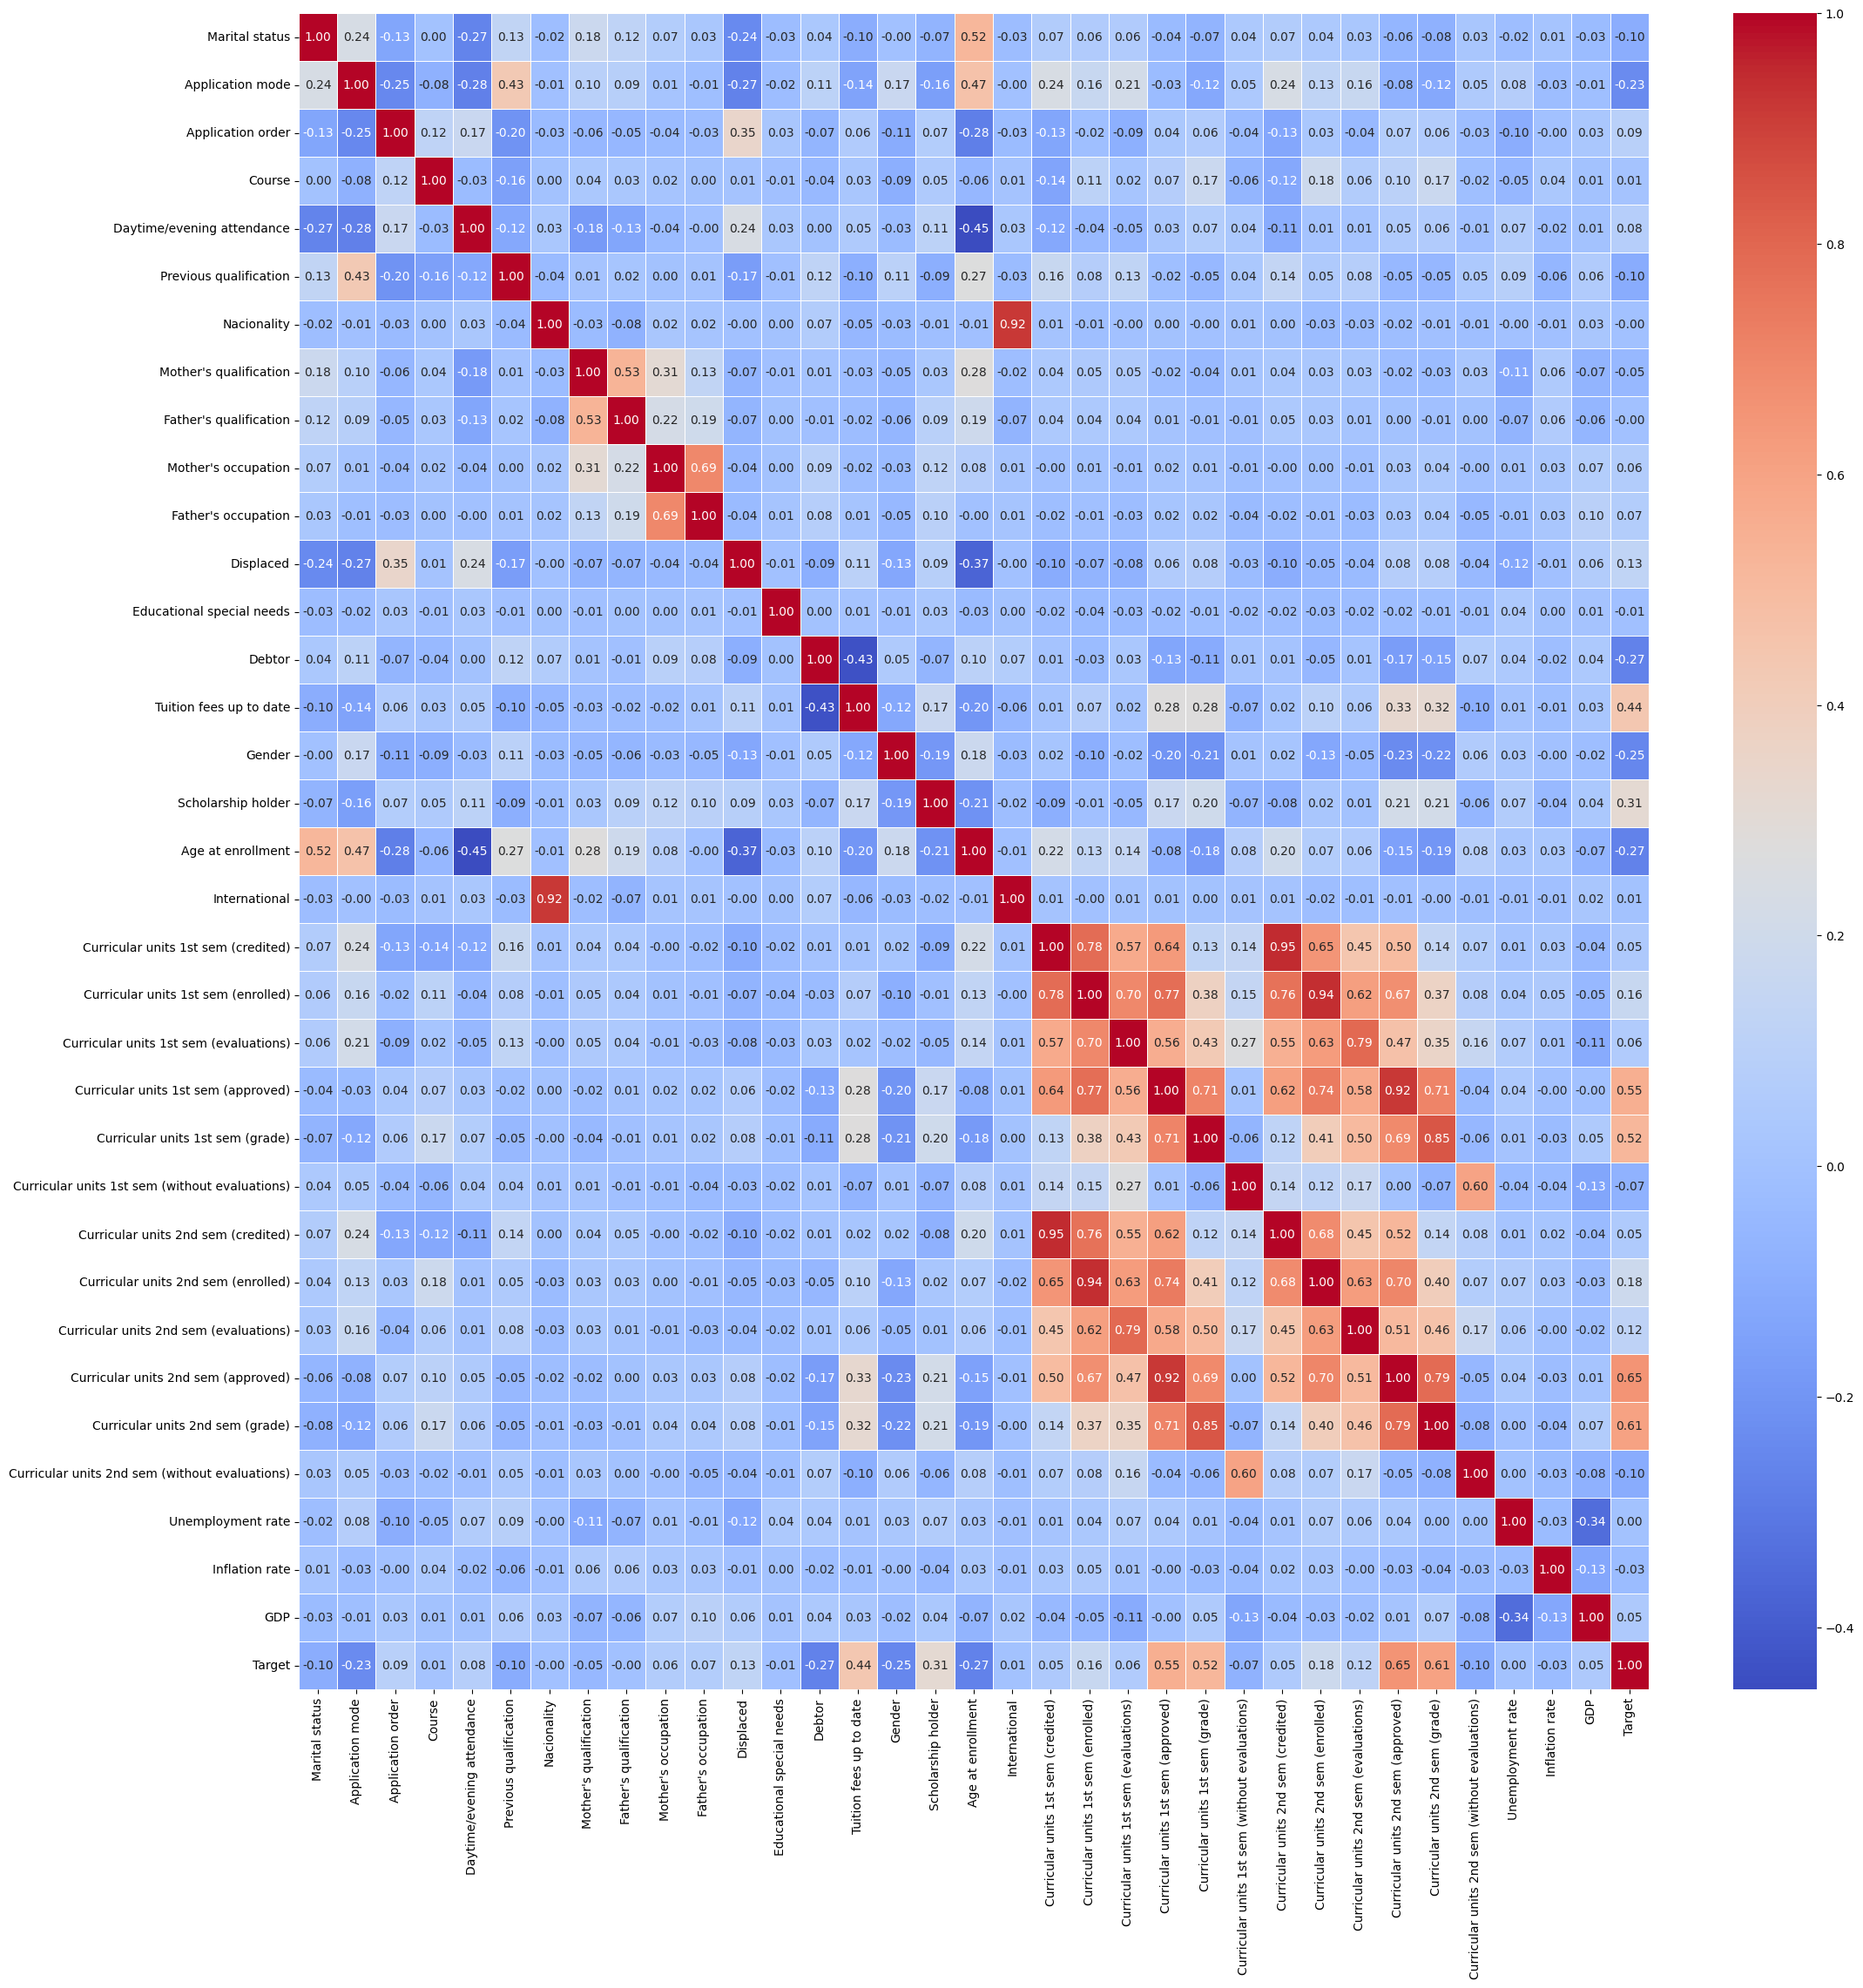

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [ ]:
#WILL DROP ONE OF THE FEATURES WHICH ARE LESS MORE THAN .85 CORELATED TO EACH OTHER OR ARE .04 CORRELATED TO TARGET CLASS



In [31]:
df.drop(['International','Nacionality',"Father's qualification",'Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Course','Educational special needs','Unemployment rate','Inflation rate'],axis=1,inplace=True)

KeyError: ignored